<a href="https://colab.research.google.com/github/UrazYsl/Quantum-Projects/blob/main/HelloWorldQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EĞER KOD 'PYLATEXENC' ERRORU VERİRSE RUNTIME --> RESTART SESSION AND RUN ALL
!pip install matplotlib
!pip install qiskit-aer
!pip install qiskit
!pip install qiskit-ibmq-provider
!pip install pylatexenc

In [ ]:
import qiskit#kodda kullanmak için yerel dosyalardan buraya aktarıyoruz
import matplotlib#devreyi çizmek için library

In [ ]:
token = '6f4022bab66c46717f00ca9cbd2991e15da752e6070077444c26451558e8e5c7822cab63518697aad958c40406ec8c4bbf3a47628aa66ae8d4f75ddacd9c3327'
qiskit.IBMQ.save_account(token)#Hesaba kaydetme
qiskit.IBMQ.load_account()#Hesap yükleme

<ipython-input-3-bf991af93697>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  qiskit.IBMQ.save_account(token)#Hesaba kaydetme
<ipython-input-3-bf991af93697>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  qiskit.IBMQ.save_account(token)#Hesaba kaydetme
configrc.store_credentials:WARNING:2023-12-18 07:37:13,256: Credentials already present. Set overwrite=True to over

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


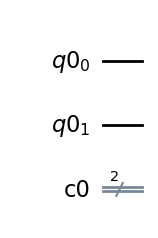

In [ ]:
qr = qiskit.QuantumRegister(2)#Devredeki Qubit sayısı
cr = qiskit.ClassicalRegister(2)#Devredeki bit sayısı

circuit = qiskit.QuantumCircuit(qr,cr)#Devreyi birleştirme
circuit.draw("mpl")#devreyi çizdiriyoruz

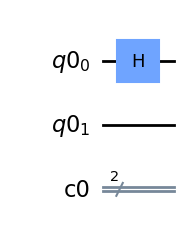

In [ ]:
circuit.h(qr[0])#hadamard kapısı ekliyoruz ilk qubite
circuit.draw("mpl")#devreyi yeniden çizdiriyoruz

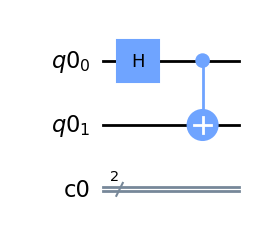

In [ ]:
circuit.cx(qr[0],qr[1])#devreye CNOT kapısı ekliyoruz
circuit.draw("mpl")#yeniden çizdiriyoruz

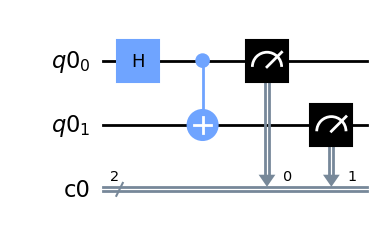

In [ ]:
circuit.measure(qr,cr)#qubitleri bit formunda ölçüyoruz
circuit.draw("mpl")#yeniden çizdiriyoruz

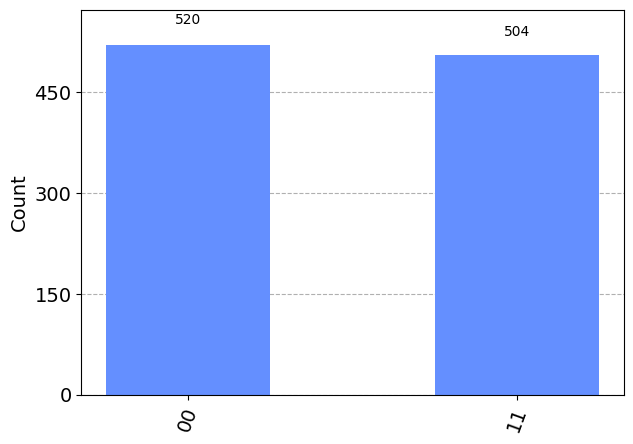

In [ ]:
simulator = qiskit.Aer.get_backend('qasm_simulator')#kuantum bilgisayar simülatörü kullanacağımızı belirtiyoruz

qiskit.execute(circuit, backend = simulator)#devreyi çalıştırtıyoruz fakat çıktı almıyoruz bu nedenle gereksiz satır
result = qiskit.execute(circuit, backend = simulator).result()#devreyi çalıştırıp çıktıyı alıyoruz

from qiskit.tools.visualization import plot_histogram#sütun çizmek için lib
plot_histogram(result.get_counts(circuit))#sonucu sütunlar halinde istetiyoruz

In [ ]:
provider = qiskit.IBMQ.get_provider('ibm-q')#bu sefer gerçek kuantum bilgisayar kullanıyoruz
qcomp = provider.get_backend('ibm_kyoto')#server adı

job = qiskit.execute(circuit, backend = qcomp)#simülasyonla aynı sadece bu sefer gerçek kuantum bilgisayar kullanıyoruz

from qiskit.tools.monitor import job_monitor#kuantum bilgisayarlar halka açık olduğu için sıra olabilir
job_monitor(job)#bakıyoruz iş olmuş mu *bu aşamada takılması normal
result = job.result()
plot_histogram(result.get_counts(circuit))

Job Status: job is queued (None)